<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#개요" data-toc-modified-id="개요-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>개요</a></span><ul class="toc-item"><li><span><a href="#주제:-Allstate-Claims-Severity" data-toc-modified-id="주제:-Allstate-Claims-Severity-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>주제: Allstate Claims Severity</a></span></li><li><span><a href="#데이터-설명" data-toc-modified-id="데이터-설명-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>데이터 설명</a></span></li><li><span><a href="#함수-설정" data-toc-modified-id="함수-설정-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>함수 설정</a></span></li></ul></li><li><span><a href="#탐색적-분석(시각화-및-전처리)" data-toc-modified-id="탐색적-분석(시각화-및-전처리)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>탐색적 분석(시각화 및 전처리)</a></span><ul class="toc-item"><li><span><a href="#cat변수-시각화-및-전처리" data-toc-modified-id="cat변수-시각화-및-전처리-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cat변수 시각화 및 전처리</a></span><ul class="toc-item"><li><span><a href="#cat변수-시각화" data-toc-modified-id="cat변수-시각화-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>cat변수 시각화</a></span></li><li><span><a href="#cat변수와-loss의-유의성(평균-차이)-검정" data-toc-modified-id="cat변수와-loss의-유의성(평균-차이)-검정-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>cat변수와 loss의 유의성(평균 차이) 검정</a></span></li><li><span><a href="#one-hot-encoding으로-수치화" data-toc-modified-id="one-hot-encoding으로-수치화-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>one-hot encoding으로 수치화</a></span><ul class="toc-item"><li><span><a href="#kmeans로-Clustering" data-toc-modified-id="kmeans로-Clustering-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>kmeans로 Clustering</a></span></li><li><span><a href="#PCA로-차원축소" data-toc-modified-id="PCA로-차원축소-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>PCA로 차원축소</a></span></li></ul></li><li><span><a href="#(변수내)-범주간-loss평균으로-수치화" data-toc-modified-id="(변수내)-범주간-loss평균으로-수치화-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>(변수내) 범주간 loss평균으로 수치화</a></span><ul class="toc-item"><li><span><a href="#kmeans로-Clustering" data-toc-modified-id="kmeans로-Clustering-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>kmeans로 Clustering</a></span></li><li><span><a href="#pca로-차원축소" data-toc-modified-id="pca로-차원축소-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>pca로 차원축소</a></span></li></ul></li></ul></li><li><span><a href="#cont-변수-시각화-및-전처리" data-toc-modified-id="cont-변수-시각화-및-전처리-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>cont 변수 시각화 및 전처리</a></span><ul class="toc-item"><li><span><a href="#선형회귀모델-p-value,-VIF-확인" data-toc-modified-id="선형회귀모델-p-value,-VIF-확인-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>선형회귀모델 p-value, VIF 확인</a></span></li></ul></li><li><span><a href="#loss-시각화" data-toc-modified-id="loss-시각화-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>loss 시각화</a></span></li></ul></li><li><span><a href="#모델링" data-toc-modified-id="모델링-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#랜덤포레스트" data-toc-modified-id="랜덤포레스트-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>랜덤포레스트</a></span></li></ul></li></ul></div>

# 개요
## 주제: Allstate Claims Severity
https://www.kaggle.com/c/allstate-claims-severity<br>
보험금 청구비용(loss) 예측 모델을 구축한다.

## 데이터 설명
미국의 개인 보험 회사 Allstate 계약(id)별 보험금 청구액(loss)관련 자료이다.<br>
컬럼명 cat1,2,3... cont1,2,3... 은 아래와 같이 의미한다.<br>
'cat' - categorical(명목형 변수)<br>
'cont' - continuous (연속형 변수)<br>

cat 데이터는 A,B,C...., LB,DC,CQ...등 유형을 나타내도록 변환되었고, cont 데이터는 0~1 소숫점으로 변환되어 주어진 상태이다.<br>
***변수가 익명화 되어 있어 변수 의미에 따른 분석 불가***

In [13]:
# !pip install xgboost
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

## 함수 설정

In [2]:
# Kmeans 관련 함수 설정

# kmeans로 확인 후 cont변수와 합쳐주는 DF 생성 함수
def kmeans_united(n, df) :
    # Kmenas로 변환
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    res = pd.Series(kmeans.labels_)
    tmp_X = pd.get_dummies(res, prefix="kmeans")
    
    # 기존 cont데이터와 병합
    new_X = pd.concat([tmp_X, X[cont_columns]], axis=1)
    
    return new_X

# kmeans Elbow 시각화
def kmeans_Elbow(df):
    cluster_range = range( 1, 20 )
    cluster_errors = []

    for num_clusters in cluster_range:
      clusters = KMeans( num_clusters )
      clusters.fit( df )
      cluster_errors.append( clusters.inertia_ )

    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

    # Kmeans cluster_errors의 최적화 시각화
    plt.figure(figsize=(12,6), )
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o", )
    plt.title("The Elbow Method showing the optimal k")
    plt.show()
    
# kmeans 실행(클러스터 갯수 3,5,10,15,20,25 결과값 출력)
def kmeans_run(df) :
    reg_train_result = []
    reg_test_result = []
    kmeans_n = []
    for cluster in [3,5,10,15,20,30,40]:
        # Kmeans 실행
        X_kmeans = kmeans_united(cluster, df) 

        # 회귀분석 실행
        X_train, X_test, Y_train, Y_test = train_test_split(X_kmeans, y, test_size=0.3, random_state=5) 
        lm = LinearRegression()
        lm.fit(X_train,Y_train)
        Y_pred_train = lm.predict(X_train)
        Y_pred_test = lm.predict(X_test)

        # 결과저장
        kmeans_n.append(f'Kmeans_{cluster}')
        reg_train_result.append(str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
        reg_test_result.append(str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))
    
    list_result = list(zip(kmeans_n, reg_train_result, reg_test_result))
    result = pd.DataFrame(list_result, columns = ['kmeans_n', 'reg_train_result','reg_test_result'])
    print(result)

In [3]:
# PCA 관련 함수 설정

# pca로 차원축소 후 cont변수와 합쳐주는 DF 생성 함수
def pca_united(n, df) :
    # pca로 변환
    pca = PCA(n_components = n)
    X_pca = pca.fit_transform(df)
    
    # 기존 cont데이터와 병합
    new_X = pd.concat([pd.DataFrame(X_pca), X[cont_columns]], axis=1)
    
    return new_X

# pca 실행(주성분 갯수 3,5,10,15,20,25,30,35,40 결과값 출력)
def pca_run(df) :
    reg_train_result = []
    reg_test_result = []
    pca_n = []
    for cluster in [3,5,10,15,20,25,30,35,40]:
        # Kmeans 실행
        X_pca = pca_united(cluster, df) 

        # 회귀분석 실행
        X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.3, random_state=5) 
        lm = LinearRegression()
        lm.fit(X_train,Y_train)
        Y_pred_train = lm.predict(X_train)
        Y_pred_test = lm.predict(X_test)

        # 결과저장
        pca_n.append(f'pca_{cluster}')
        reg_train_result.append(str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
        reg_test_result.append(str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))

    list_result = list(zip(pca_n, reg_train_result, reg_test_result))
    result = pd.DataFrame(list_result, columns = ['pca_n', 'reg_train_result','reg_test_result'])
    print(result)

In [4]:
# stats 모듈 선형회귀 관련 함수

# 선형회귀모델 summary와 FMSE 출력
def st_Reg(X_train, X_test, Y_train, Y_test) :
    X_train = sm.add_constant(X_train) # 상수항 생성
    
    # 모델 학습
    model = sm.OLS(Y_train, X_train).fit()
    print_model = model.summary()
    X_test = sm.add_constant(X_test)
    
    # 회귀모형 predict
    predictions = model.predict(X_test)
    rmse = sm.tools.eval_measures.rmse(predictions, Y_test, axis=0)
    
    # 다중공선성 검정(vif)
    tmp_vif = pd.DataFrame()
    tmp_vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    tmp_vif = tmp_vif.T
    tmp_vif.columns = X_train.columns
    
    print(print_model)
    print('---------------------------------------------------------------------------------')
    print(f'RMSE : {rmse}')
    print('---------------------------------------------------------------------------------')
    print(tmp_vif)

# 탐색적 분석(시각화 및 전처리)

In [5]:
train = pd.read_csv('train.csv')
train.shape

(188318, 132)

In [6]:
X = train.iloc[:,1:-1]
y = train.loss
# X, X_validation, y, y_validation = train_test_split(X, y, test_size=0.5, random_state=5)

# X = X.reset_index()
# X = X.drop(columns='index')
# y = y.reset_index()
# y = y.drop(columns='index')

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), object(116)
memory usage: 186.8+ MB


In [6]:
X.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [7]:
X.describe(include = ['object'])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


In [8]:
X.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


In [7]:
# cout와 cat 변수명 리스트로 담기
cont_columns = []
cat_columns = []

for i in X.columns:
    if X[i].dtype == 'float':
        cont_columns.append(i)
    elif X[i].dtype == 'object':
        cat_columns.append(i)

## cat변수 시각화 및 전처리
### cat변수 시각화

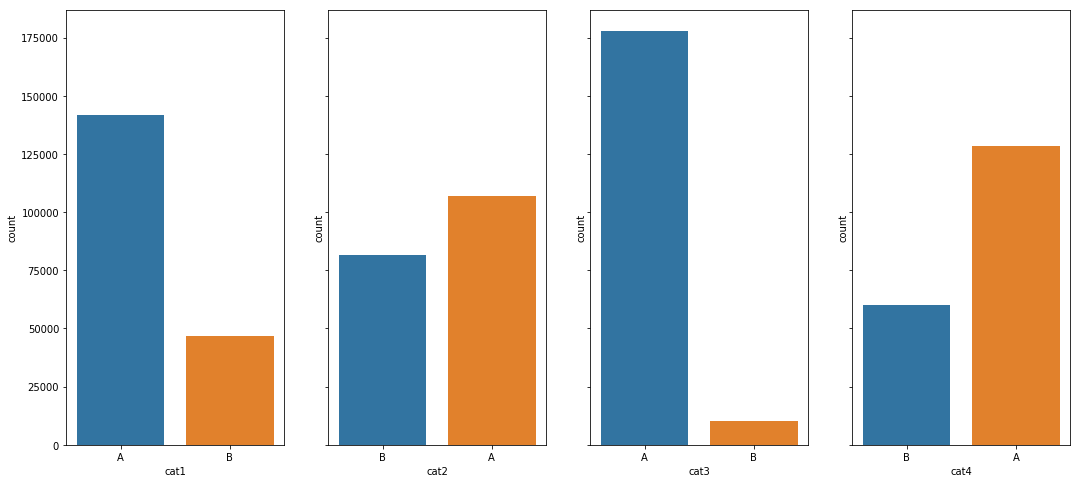

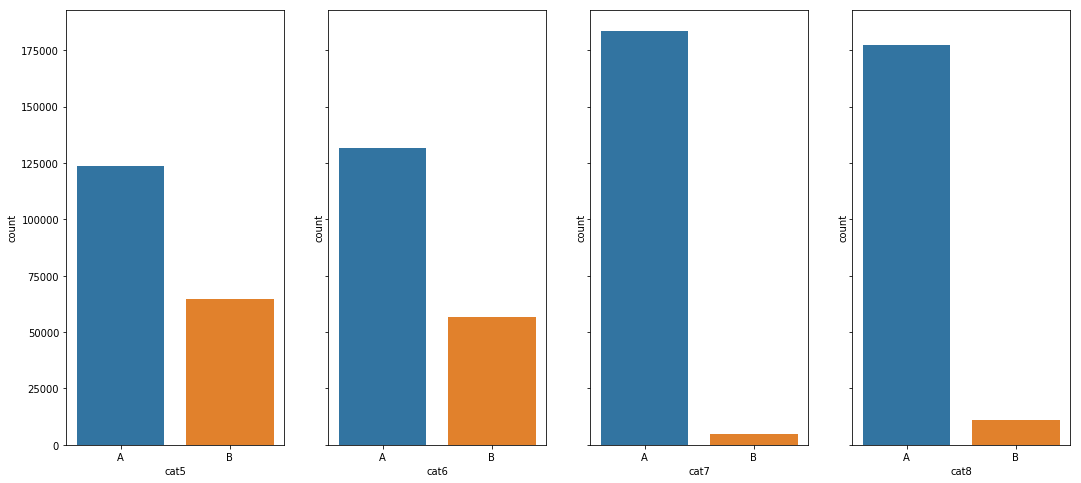

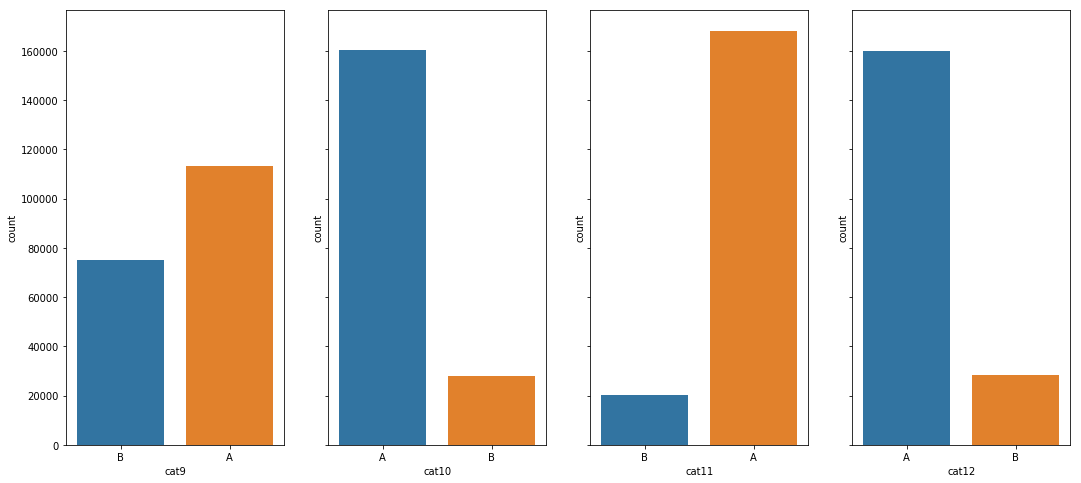

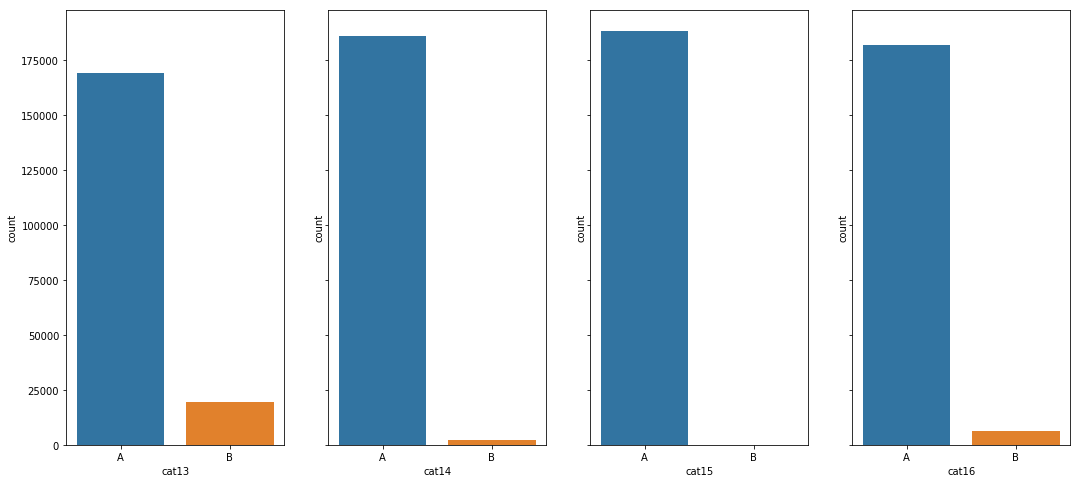

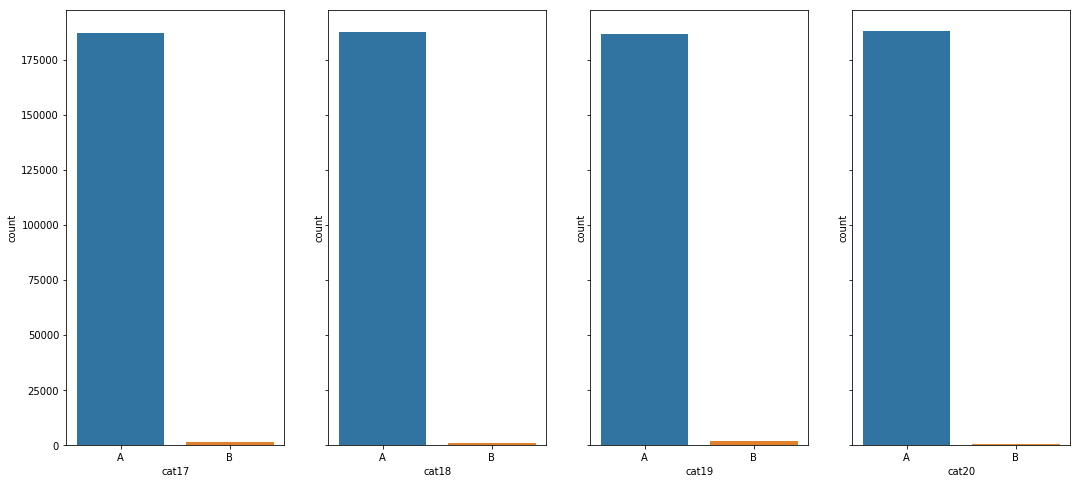

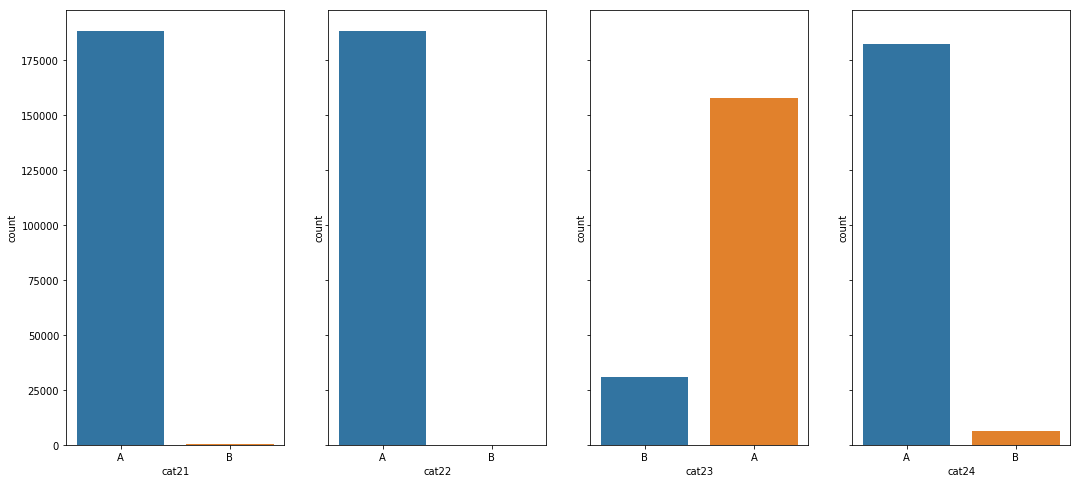

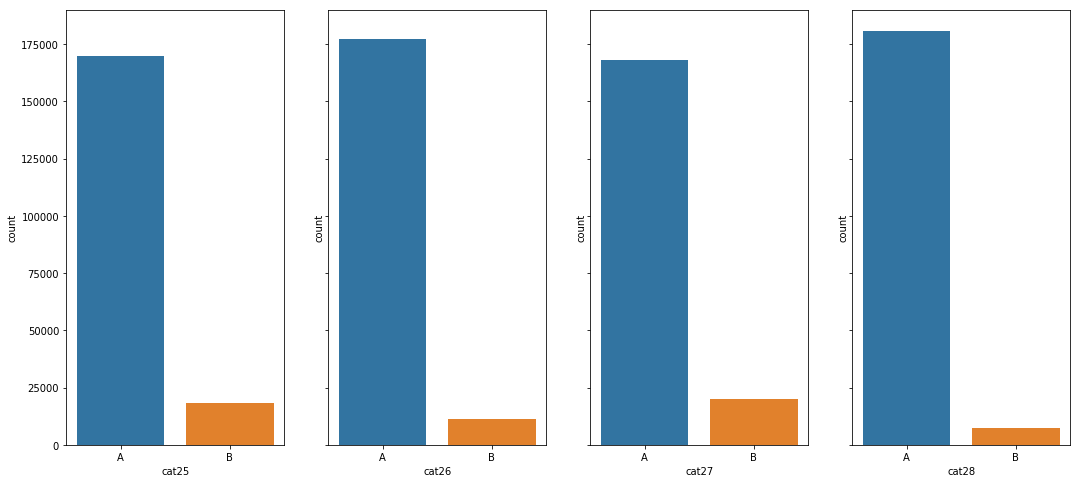

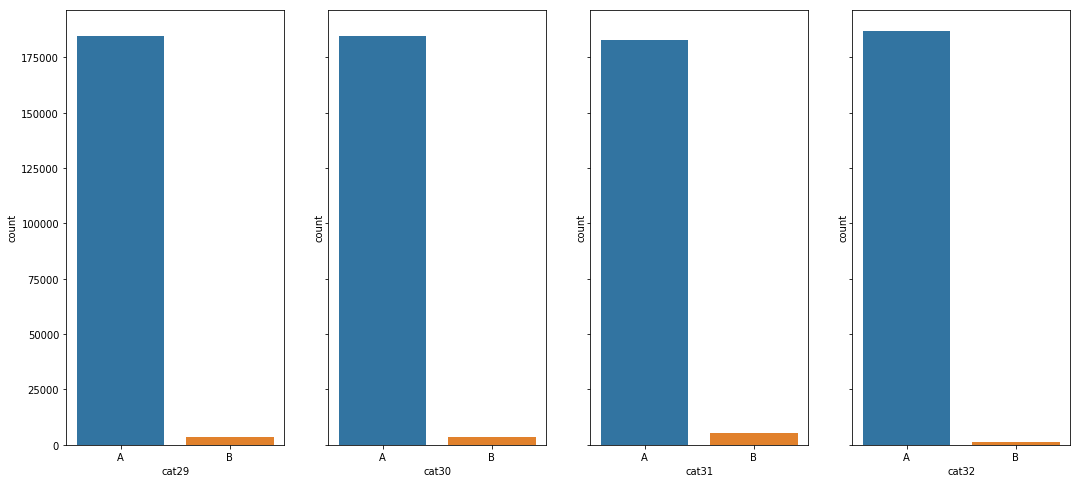

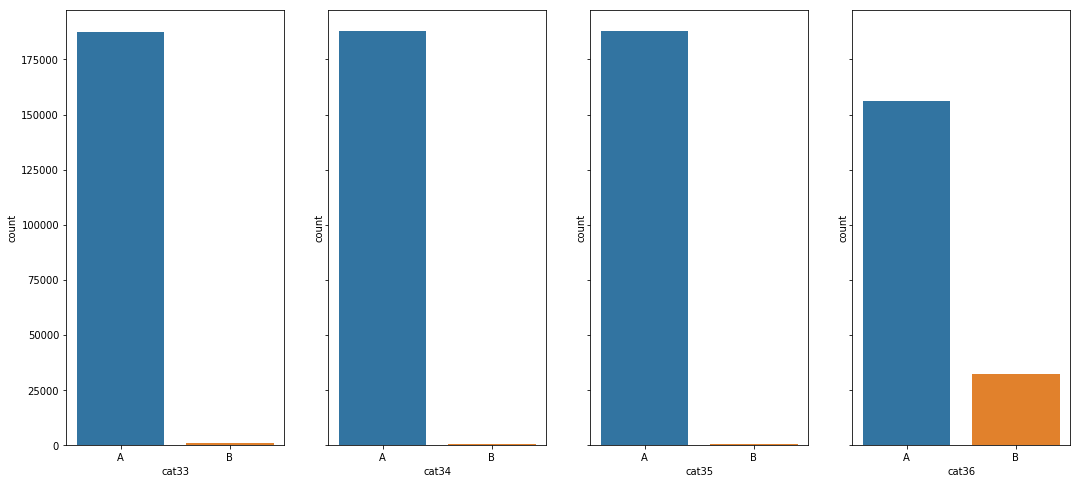

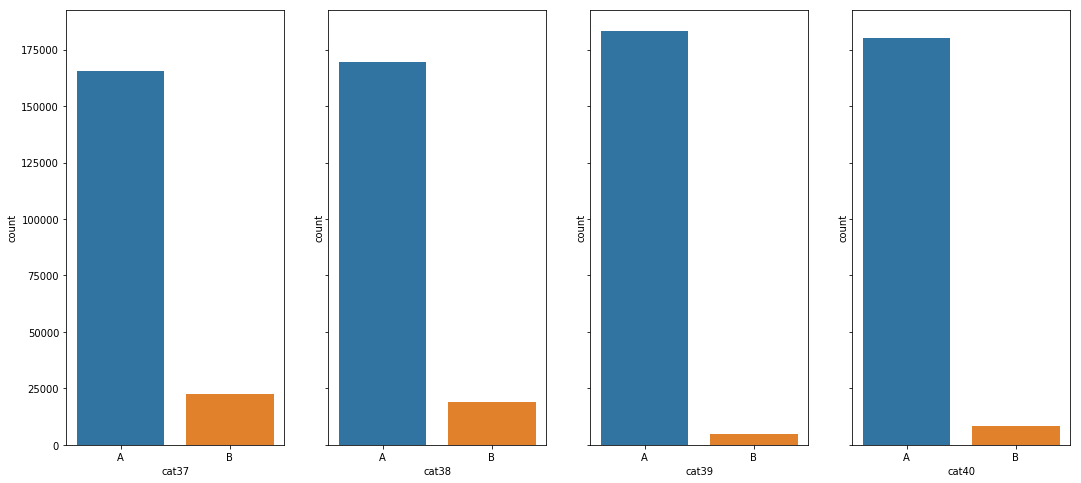

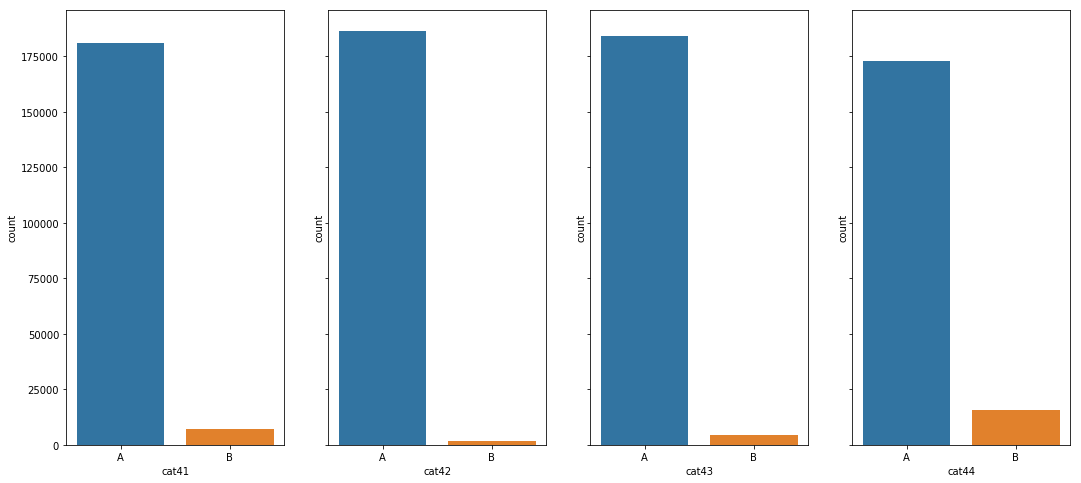

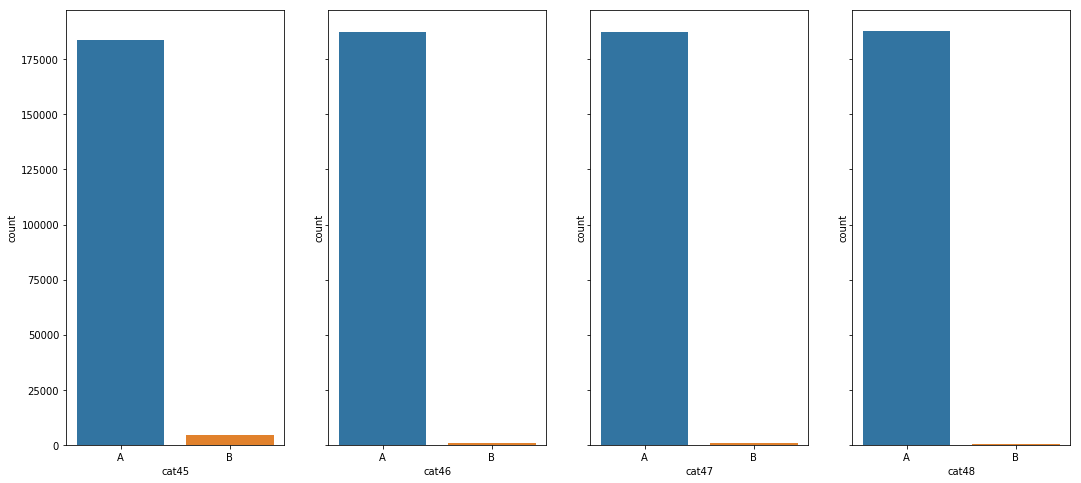

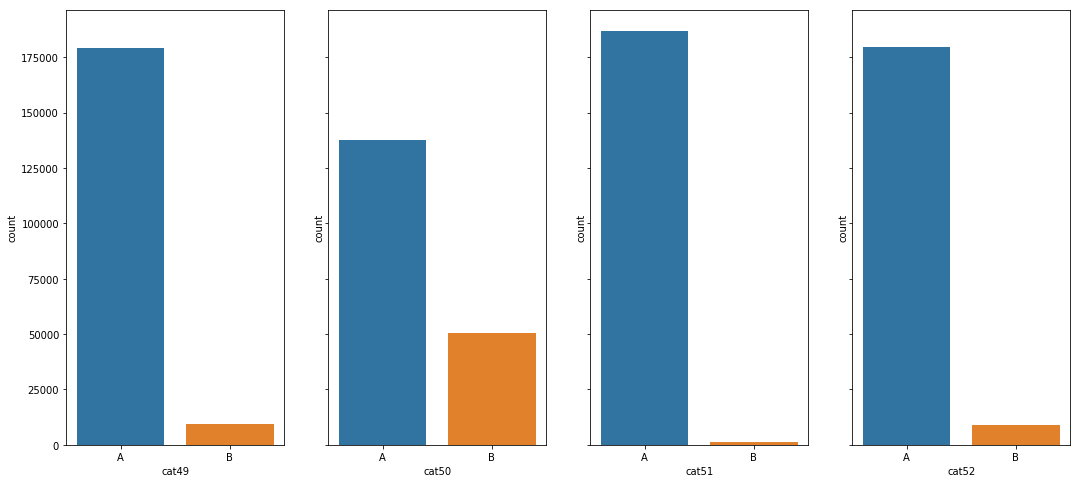

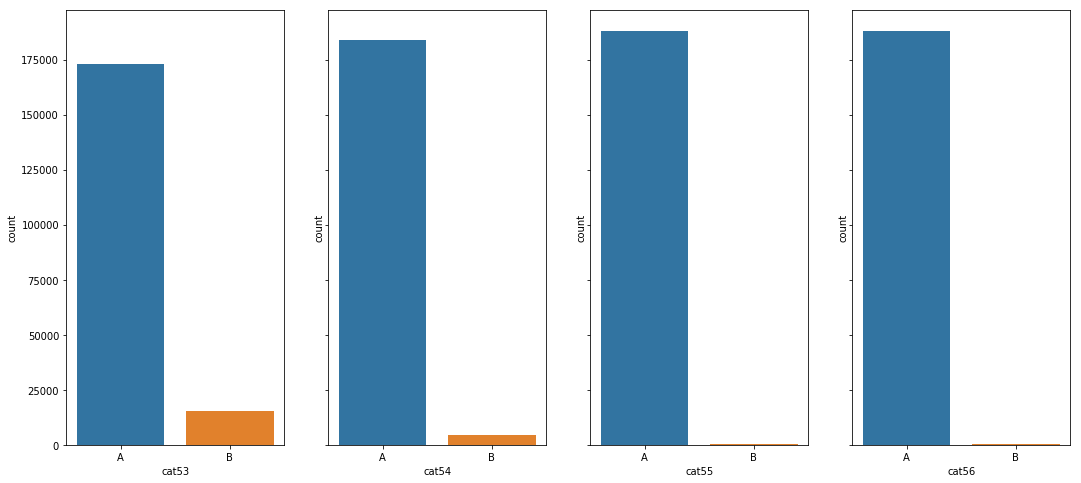

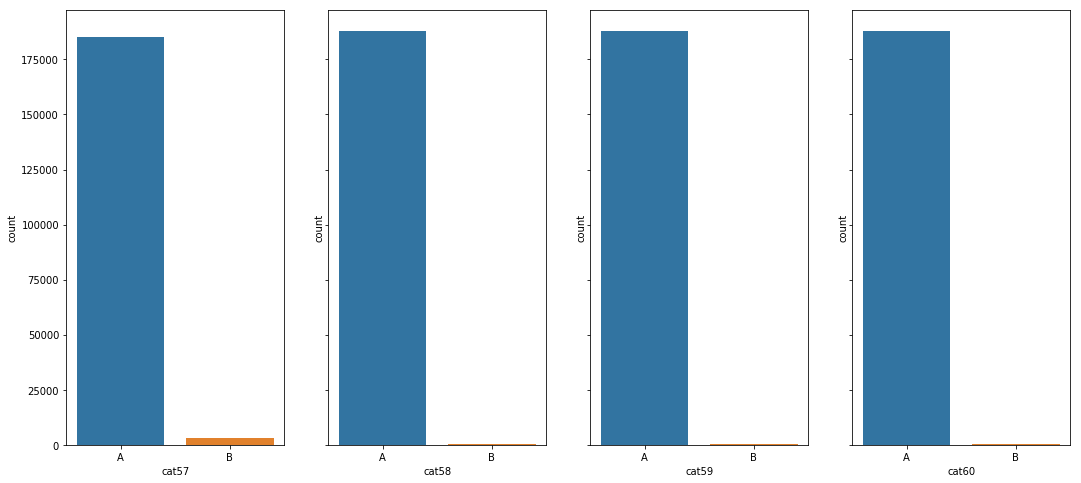

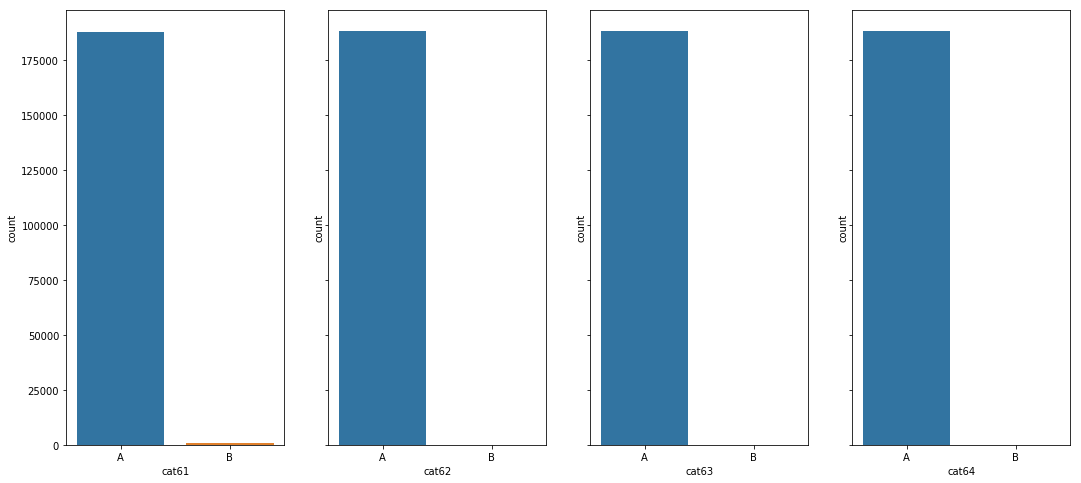

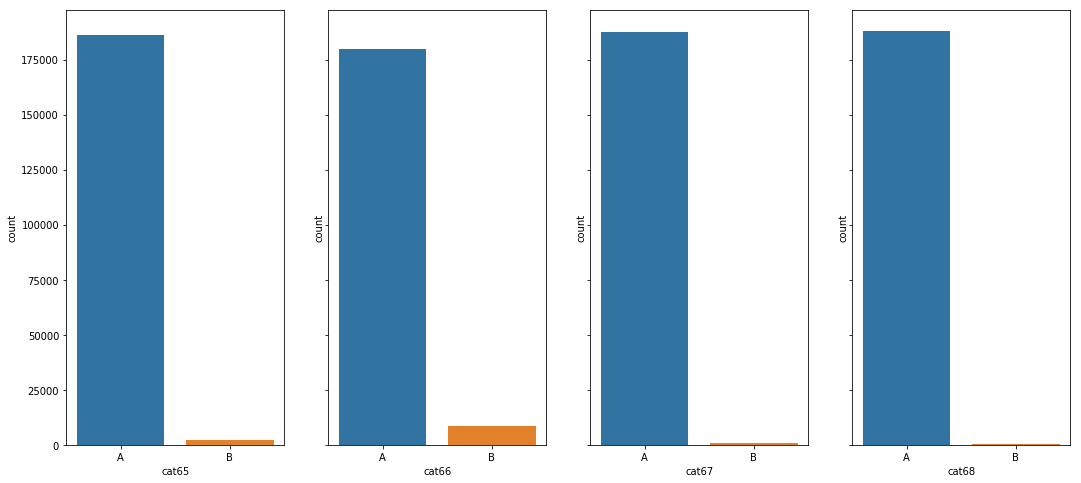

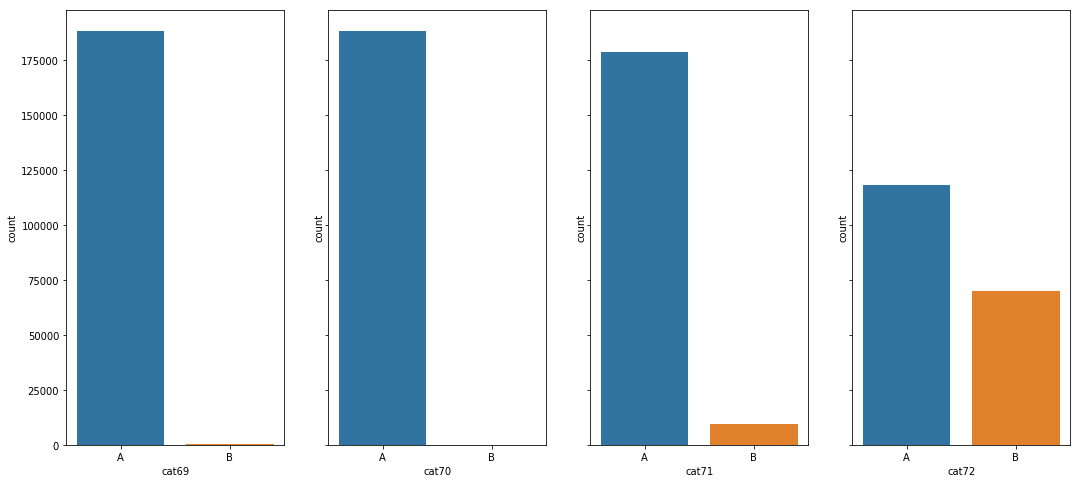

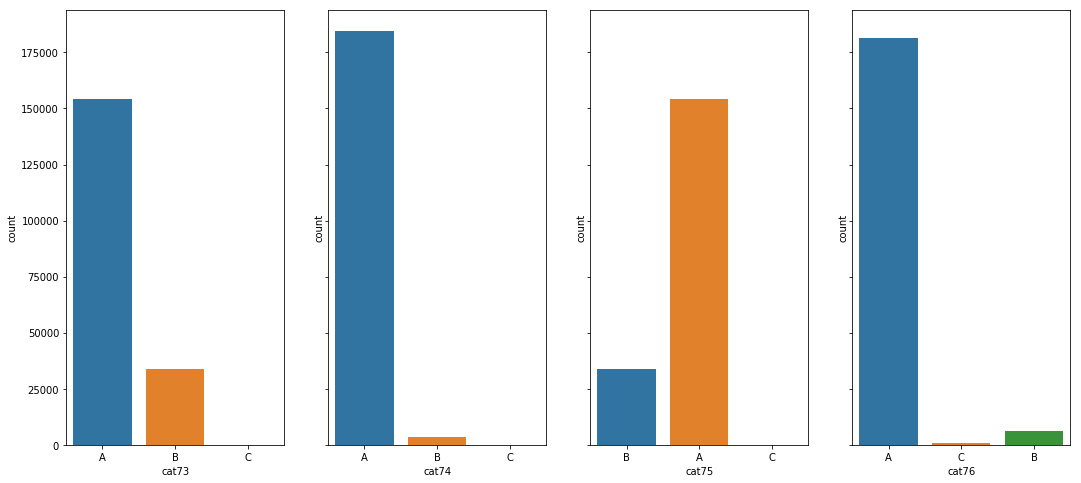

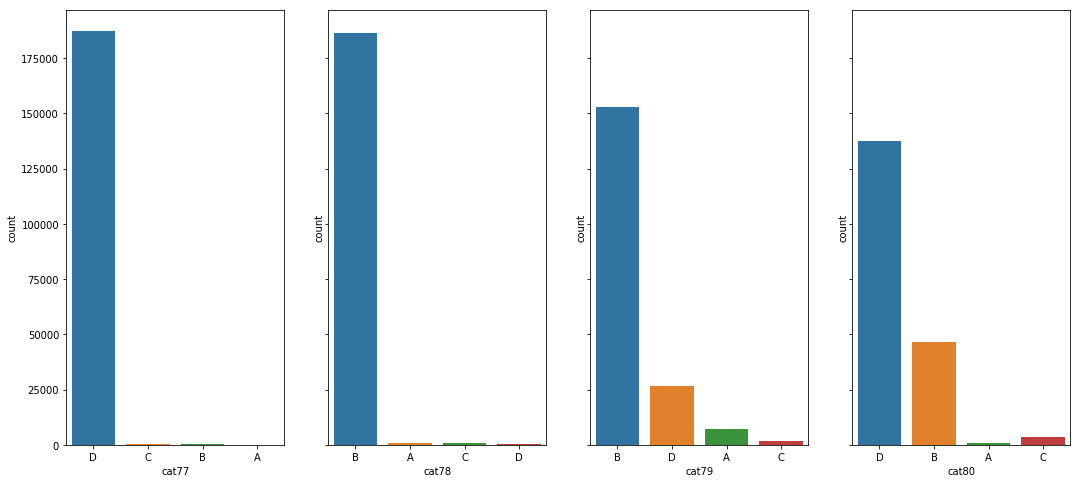

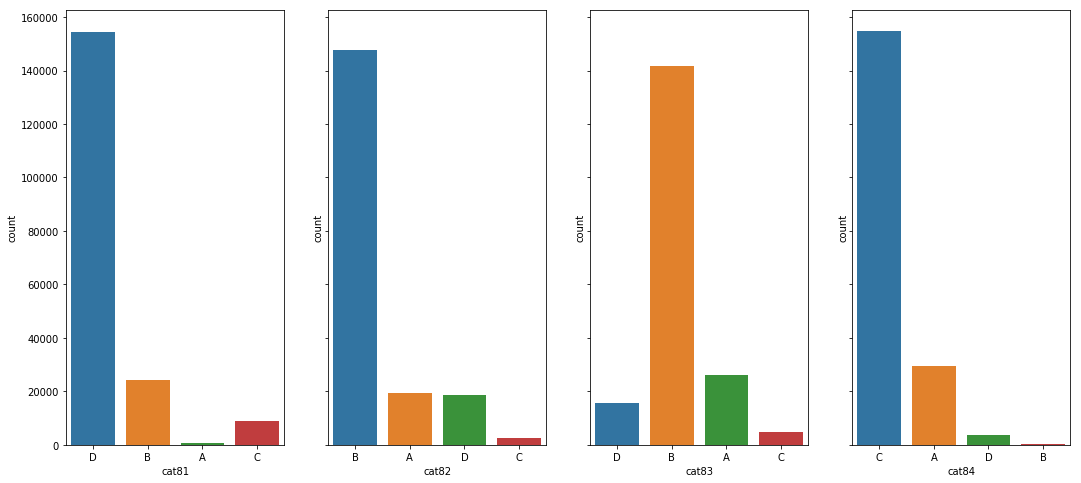

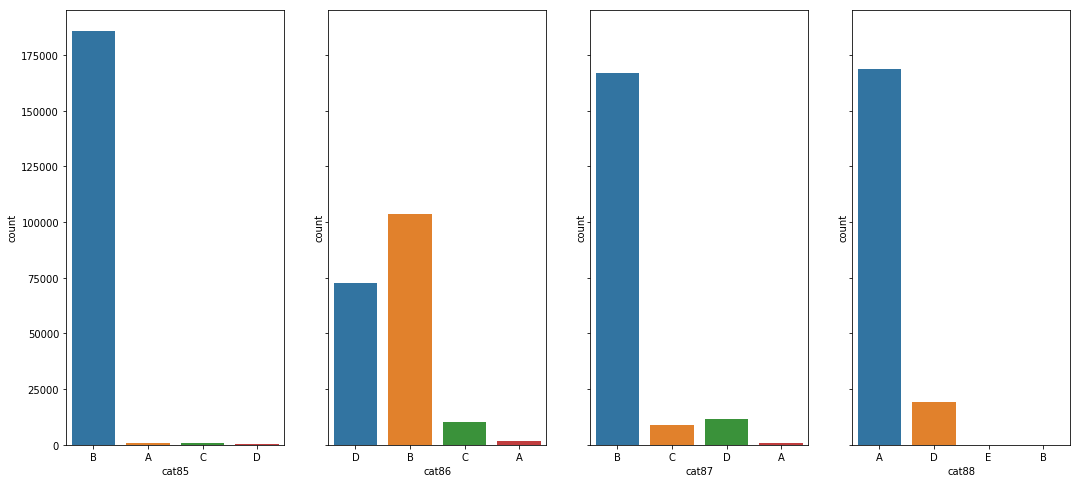

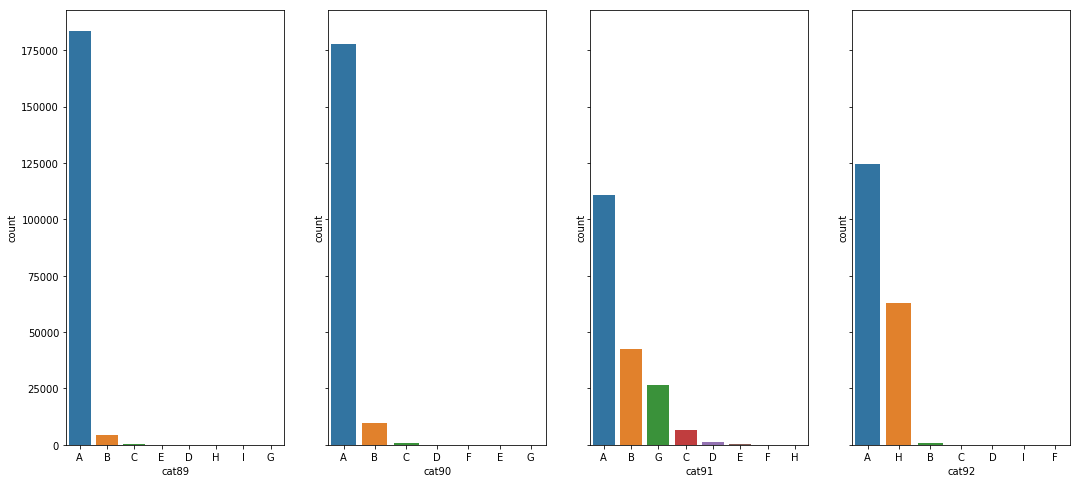

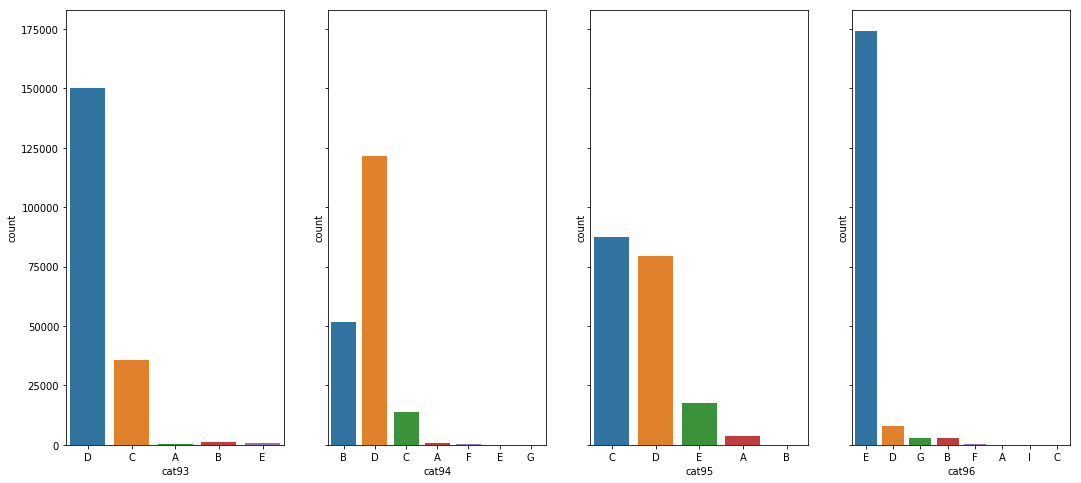

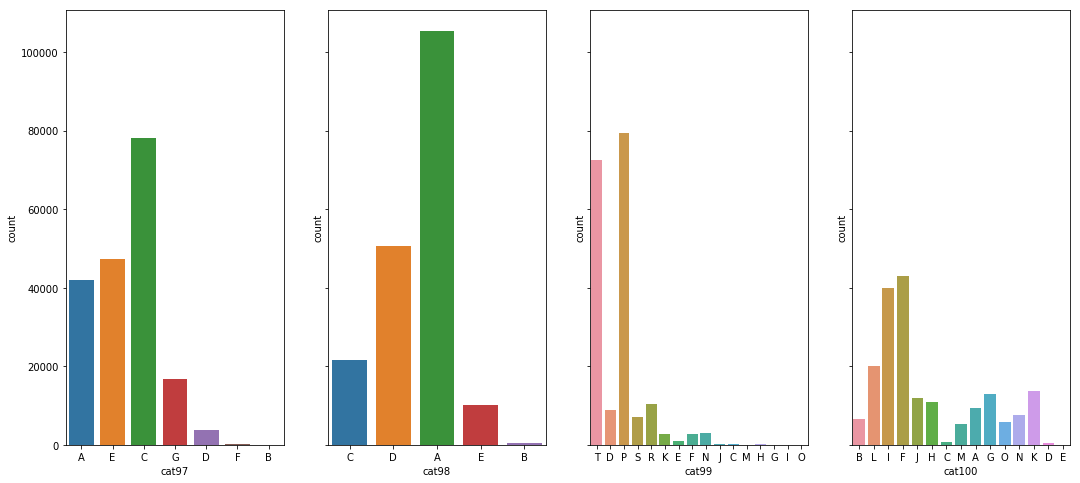

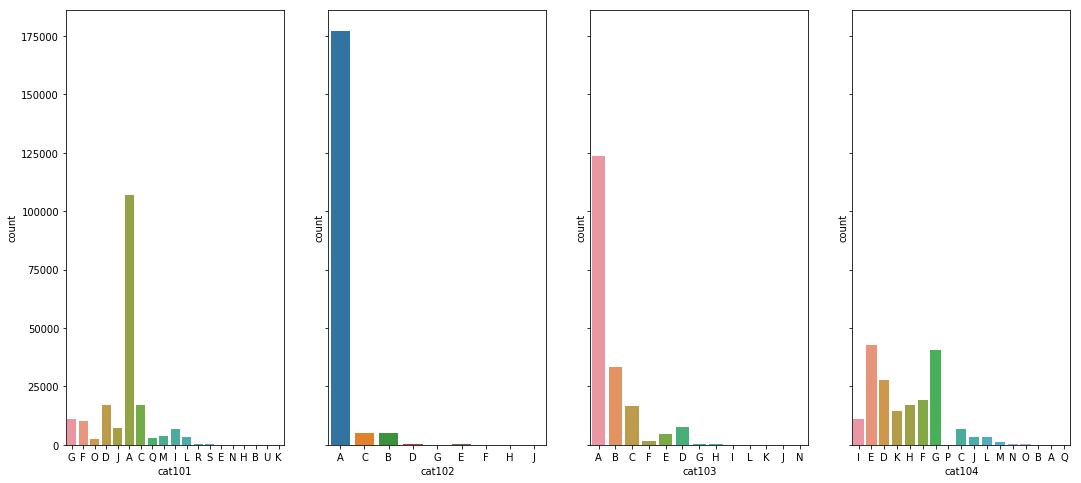

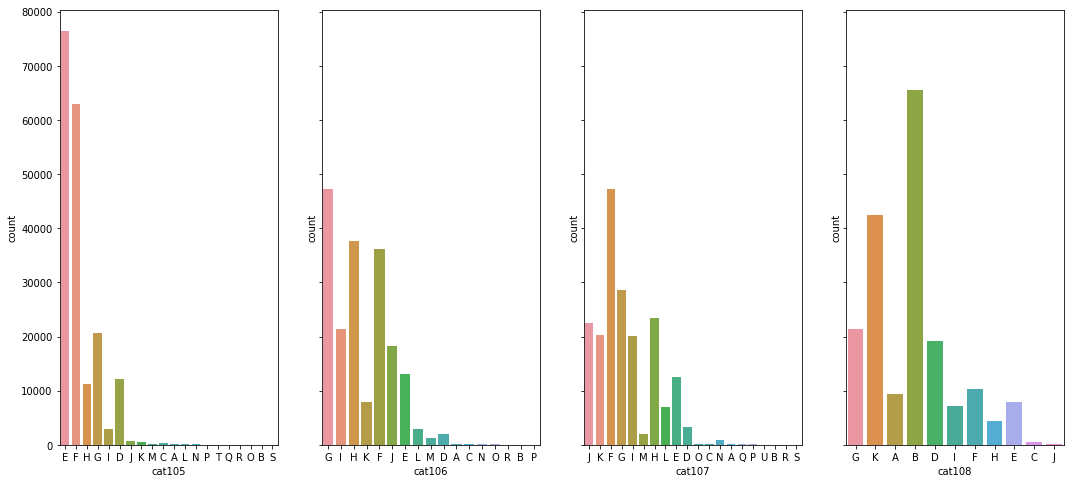

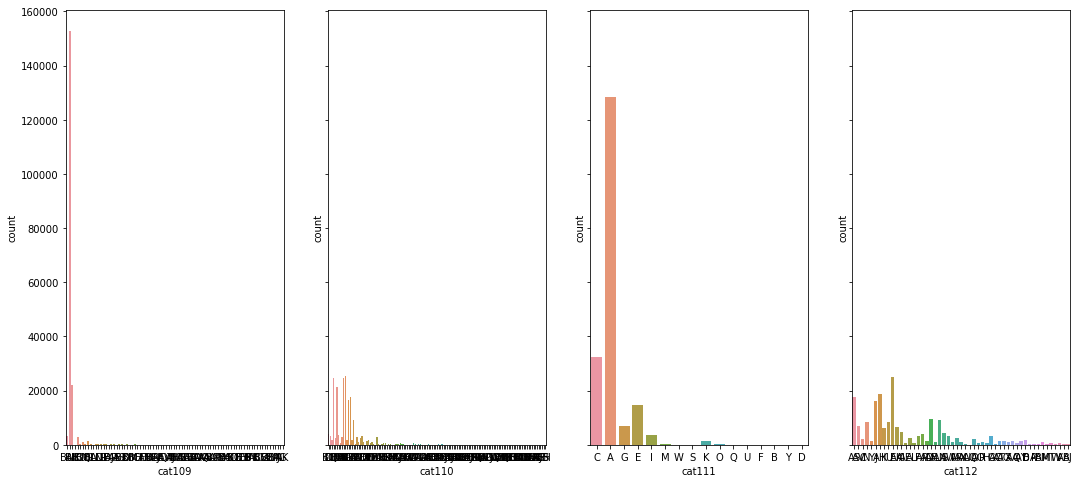

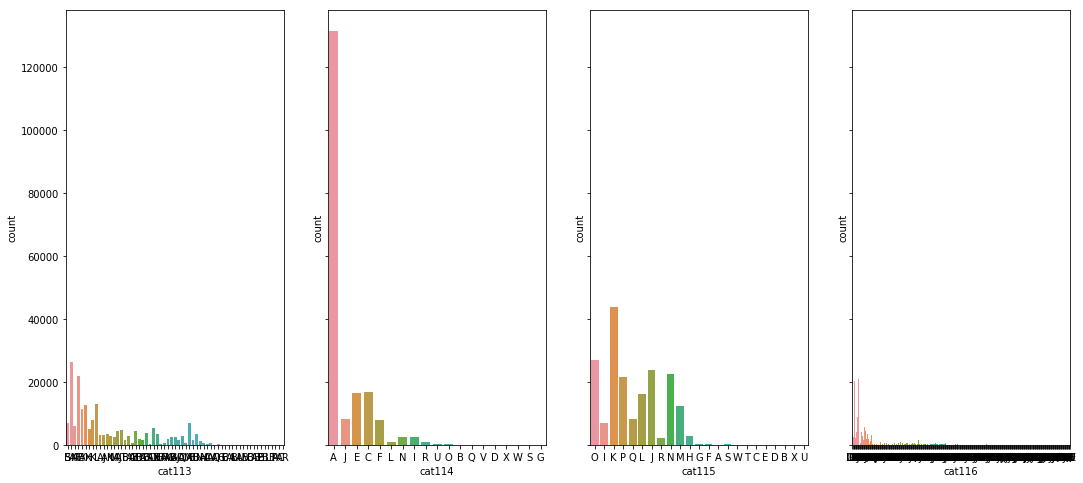

In [22]:
cols = X.columns

# 29x4 형태로 시각화

n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(18, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train, ax=ax[j])

### cat변수와 loss의 유의성(평균 차이) 검정
- 범주가 2개인 변수 -> t-test
- 범주가 3개인 변수 -> anova 검정

t-test, anova검정에서 유의확률 0.05이상인 변수는 제외후 수치화

In [10]:
# cat 변수와 loss값에 유의미한 차이(평균의 차이)가 있는 변수만 설정
X_cat = X[cat_columns]
X_cat = pd.concat([X_cat, y], axis=1)

# 범주가 2개인 변수는 t-test, 3개 이상인 변수는 anova검정을 통해 유의미한 변수만 추출
mean_significant = []
for cat in X_cat.drop(columns=['loss']).columns :
    # 각 컬럼별 unique 갯수가 2면 t-test, 3이상이면 Anova분석으로 진행
    tmp_unique_len = len(X_cat[cat].unique())
    
    # t- test
    if tmp_unique_len == 2 :
        ttest_val = []
        
        for u_len in range(0,tmp_unique_len) :
            ttest_val.append(X_cat[cat].unique()[u_len])
            
        tmp_a = X_cat['loss'][X_cat[cat] == ttest_val[0]]
        tmp_b = X_cat['loss'][X_cat[cat] == ttest_val[1]]
        
        if st.ttest_ind(tmp_a, tmp_b, equal_var=False)[1] < 0.05 :
            mean_significant.append(cat)
            #print(f'''{cat}의 p-value : {st.ttest_ind(tmp_a, tmp_b, equal_var=False)[1]}''')
    
    # anova 검정
    else:
        anova_val = []
        
        for u_len in range(0,tmp_unique_len) :
            anova_val.append(X_cat[cat].unique()[u_len])
                
        if st.f_oneway(*(X_cat['loss'][X_cat[cat] == val] for val in anova_val))[1] < 0.05 :
            mean_significant.append(cat)
            #print(f'''{cat}의 p-value : {st.f_oneway(*(X_cat['loss'][X_cat[cat] == val] for val in anova_val))[1]}''')
            

X_cat = X_cat[mean_significant]
X_cat = pd.concat([X_cat, y], axis=1)

In [11]:
X_cat.columns

Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10',
       ...
       'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114',
       'cat115', 'cat116', 'loss'],
      dtype='object', length=113)

In [12]:
# cat변수 유의성 검정은 cout변수로 선형회귀 실행한 RSME보다 작을 경우 유의한 의미 있다고 가정

X_cont = X[cont_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_cont, y, test_size=0.3, random_state=5) 
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

2846.8773417635985
2841.3495187254157


<font color=blue>**cont 변수로 단순회귀 실행 RSME : '2841.35'을 기준으로 cat변수 수치화에 대한 성능평가**</font>

### one-hot encoding으로 수치화
- one-hot encoding으로 수치화는 했을 경우 미세한 RSME 감소
- one-hot encoding은 유의한 전처리 아닌 것으로 확인

In [59]:
# cat변수 더미(one-hot encoding)로 변환
X_cat_dummy = X.iloc[:,0:116]
X_cat_dummy = pd.get_dummies(X_cat_dummy, prefix=X_cat_dummy.columns)

#### kmeans로 Clustering

In [ ]:
# kmeans elbow 시각
kmeans_Elbow(X_cat_dummy)

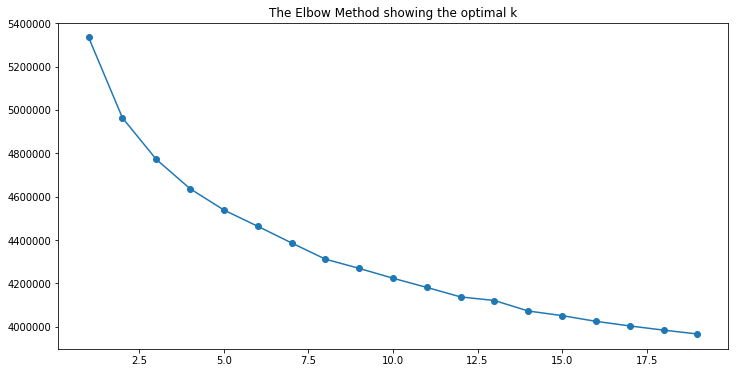

In [60]:
kmeans_run(X_cat_dummy)

    kmeans_n    reg_train_result     reg_test_result
0   Kmeans_3  2800.8846792808945   2796.286219766218
1   Kmeans_5  2761.8981775265106  2757.0451464011207
2  Kmeans_10  2757.8575248033785   2755.535573099579
3  Kmeans_15  2707.6298572078454  2708.1538585703543
4  Kmeans_20  2665.5270570065704  2661.8867763166386
5  Kmeans_30  2678.4167723303626  2670.4387214213034
6  Kmeans_40  2643.6001395130957  2632.4596334752973


#### PCA로 차원축소

### (변수내) 범주간 loss평균으로 수치화
- **PCA 차원축소를 활용할 경우 성능이 가장 좋음**
    - Kmeans로 clustering 갯수 15개 이후 2200대 RMSE로 큰 감소 없음
    - PCA 차원축소 40 기준 RMSE: 2056.93으로 감소

In [11]:
# 범주를 각 평균값으로 설정
for cat in X_cat.drop(columns=['loss']).columns :
    tmp_unique_len = len(X_cat[cat].unique())
    for u_len in range(0,tmp_unique_len) :
        tmp_mean = round(X_cat[X_cat[cat] == X_cat[cat].unique()[u_len]].loss.mean(),2)
        X_cat[cat][X_cat[cat]==X_cat[cat].unique()[u_len]] = tmp_mean

In [12]:
# 값 설정 제대로 들어갔는지 확인
for n in range(1,10) :
    print(f'''X_cat[cat{n}]''')
    print(f'''unique1 : {round(X_cat[X_cat[f'cat{n}'] == X_cat[f'cat{n}'].unique()[0]].loss.mean(),2)}''')
    print(f'''unique2 : {round(X_cat[X_cat[f'cat{n}'] == X_cat[f'cat{n}'].unique()[1]].loss.mean(),2)}''')
    print(X_cat[f'cat{n}'].unique())
    print('---------------------------------------------------------------')

X_cat[cat1]
unique1 : 3408.09
unique2 : 1915.2
[3408.09 1915.2]
---------------------------------------------------------------
X_cat[cat2]
unique1 : 3800.1
unique2 : 2454.14
[3800.1 2454.14]
---------------------------------------------------------------
X_cat[cat3]
unique1 : 2902.22
unique2 : 5366.64
[2902.22 5366.64]
---------------------------------------------------------------
X_cat[cat4]
unique1 : 3488.39
unique2 : 2826.83
[3488.39 2826.83]
---------------------------------------------------------------
X_cat[cat5]
unique1 : 2814.65
unique2 : 3464.01
[2814.65 3464.01]
---------------------------------------------------------------
X_cat[cat6]
unique1 : 3259.92
unique2 : 2519.69
[3259.92 2519.69]
---------------------------------------------------------------
X_cat[cat7]
unique1 : 2908.94
unique2 : 8195.08
[2908.94 8195.08]
---------------------------------------------------------------
X_cat[cat8]
unique1 : 2975.56
unique2 : 4028.99
[2975.56 4028.99]
----------------------------

In [34]:
# 숫자를 줄이기 위해 제곱근 설정
X_cat_sqrt = X_cat.drop(columns='loss').astype(int).apply(np.sqrt)

#### kmeans로 Clustering

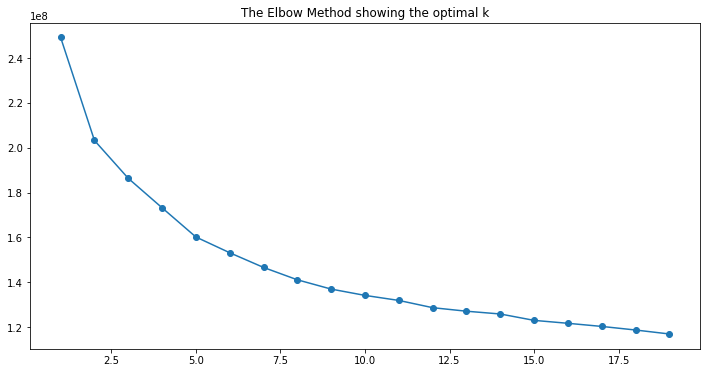

In [53]:
# kmeans elbow 시각화
kmeans_Elbow(X_cat_sqrt)

In [54]:
# kmeans cluster 갯수별 선형회귀 RMSE 확인
kmeans_run(X_cat_sqrt)

    kmeans_n    reg_train_result     reg_test_result
0   Kmeans_3  2424.8836303451026    2413.23559900217
1   Kmeans_5   2374.722717996127  2360.6149615648815
2  Kmeans_10   2321.615348672915   2305.904578296417
3  Kmeans_15  2304.4914823763793   2295.622236100233
4  Kmeans_20  2251.5747606572377  2239.6515830510525
5  Kmeans_30   2234.204116292592  2222.9365838670215
6  Kmeans_40  2234.2038810845975   2221.184676056277


#### pca로 차원축소 

In [50]:
pca_test = PCA(n_components=40)
pca_test.fit(X_cat_sqrt)
for pca_n in [5, 10, 15, 20, 25, 30, 35, 40] :
    print(f'pca_{pca_n} 설명력: {round(np.cumsum(pca_test.explained_variance_ratio_)[pca_n-1],2)}')

pca_5 설명력: 0.52
pca_10 설명력: 0.67
pca_15 설명력: 0.78
pca_20 설명력: 0.84
pca_25 설명력: 0.88
pca_30 설명력: 0.91
pca_35 설명력: 0.94
pca_40 설명력: 0.95


In [51]:
# pca 주성분 갯수 별 RSME 출력
pca_run(X_cat_sqrt)

    pca_n    reg_train_result     reg_test_result
0   pca_3  2220.0691574269204  2210.4991802884633
1   pca_5   2202.561770425762  2193.7195666911794
2  pca_10  2144.1193517292236   2150.550280666941
3  pca_15   2131.179320714182  2140.9348741850813
4  pca_20  2117.9439224686535  2125.6560610084866
5  pca_25  2110.9101795757865   2116.766695910625
6  pca_30   2097.047666834481  2101.7659719129692
7  pca_35  2062.2403168783194  2062.0866644700045
8  pca_40  2058.1199827834344  2056.9310786906344


In [27]:
# cat변수 Scale로 변경후 PCA실행
X_cat_scale = pd.DataFrame(scale(X_cat.drop(columns='loss')))
print('scale로 변경후 PCA실행')
print('----------------------------------------------')
pca_test = PCA(n_components=40)
pca_test.fit(X_cat_scale)
for pca_n in [5, 10, 15, 20, 25, 30, 35, 40] :
    print(f'pca_{pca_n} 설명력: {round(np.cumsum(pca_test.explained_variance_ratio_)[pca_n-1],2)}')

print('----------------------------------------------')
# pca 주성분 갯수 별 RSME 출력
pca_run(X_cat_scale)

scale로 변경후 PCA실행
----------------------------------------------
pca_5 설명력: 0.21
pca_10 설명력: 0.32
pca_15 설명력: 0.39
pca_20 설명력: 0.46
pca_25 설명력: 0.51
pca_30 설명력: 0.56
pca_35 설명력: 0.6
pca_40 설명력: 0.64
----------------------------------------------
    pca_n    reg_train_result     reg_test_result
0   pca_3  2355.2810825193023  2350.3032774921276
1   pca_5  2353.2861950846213    2346.66933156115
2  pca_10  2159.4200357916043   2162.222005086726
3  pca_15   2142.363464143158   2145.710857860159
4  pca_20   2129.051377246066  2129.2460945304633
5  pca_25  2086.1919400256975  2086.7507644222937
6  pca_30  2078.7468673313583   2084.689793218508
7  pca_35  2073.3915276578837  2075.6652169422027
8  pca_40   2072.041117427052   2072.577484964045


In [28]:
# cat변수 robust_scale로 변경후 PCA실행
X_cat_robust_scale = pd.DataFrame(robust_scale(X_cat.drop(columns='loss')))
print('robust_scale로 변경후 PCA실행')
print('----------------------------------------------')
pca_test = PCA(n_components=40)
pca_test.fit(X_cat_robust_scale)
for pca_n in [5, 10, 15, 20, 25, 30, 35, 40] :
    print(f'pca_{pca_n} 설명력: {round(np.cumsum(pca_test.explained_variance_ratio_)[pca_n-1],2)}')

print('----------------------------------------------')
# pca 주성분 갯수 별 RSME 출력
pca_run(X_cat_robust_scale)

robust_scale로 변경후 PCA실행
----------------------------------------------
pca_5 설명력: 0.62
pca_10 설명력: 0.79
pca_15 설명력: 0.87
pca_20 설명력: 0.92
pca_25 설명력: 0.94
pca_30 설명력: 0.96
pca_35 설명력: 0.98
pca_40 설명력: 0.98
----------------------------------------------
    pca_n    reg_train_result     reg_test_result
0   pca_3  2299.9891051727504  2292.2198182606417
1   pca_5  2241.4421546713706  2235.7508372125317
2  pca_10   2227.043902415658  2221.0902411013703
3  pca_15  2213.6569229165816   2205.519997149805
4  pca_20  2209.4142763739187  2201.1196977727395
5  pca_25   2192.230720852312    2182.98707338707
6  pca_30   2191.626760172884  2182.2687176810923
7  pca_35  2187.7712478262197   2178.764491462453
8  pca_40   2157.863492667837  2146.9240382394223


In [31]:
# cot변수 min-max Scale로 변경후 PCA실행
X_cat_minmax = pd.DataFrame(minmax_scale(X_cat.drop(columns='loss')))
print('minmax-scale로 변경후 PCA실행')
print('----------------------------------------------')
pca_test = PCA(n_components=40)
pca_test.fit(X_cat_minmax)
for pca_n in [5, 10, 15, 20, 25, 30, 35, 40] :
    print(f'pca_{pca_n} 설명력: {round(np.cumsum(pca_test.explained_variance_ratio_)[pca_n-1],2)}')

print('----------------------------------------------')
# pca 주성분 갯수 별 RSME 출력
pca_run(X_cat_minmax)

minmax-scale로 변경후 PCA실행
----------------------------------------------
pca_5 설명력: 0.46
pca_10 설명력: 0.61
pca_15 설명력: 0.7
pca_20 설명력: 0.77
pca_25 설명력: 0.82
pca_30 설명력: 0.86
pca_35 설명력: 0.9
pca_40 설명력: 0.92
----------------------------------------------
    pca_n    reg_train_result     reg_test_result
0   pca_3  2578.5837836844753  2575.2219196538676
1   pca_5  2224.5226326813904  2218.9976609480377
2  pca_10  2198.7593707635897  2194.3893162522186
3  pca_15  2174.0916735577944  2169.0426848416214
4  pca_20     2162.9164878031   2155.488656178865
5  pca_25  2130.5222926894935    2124.25293303909
6  pca_30  2129.0859866950977   2121.289975854589
7  pca_35  2094.4917572901372   2084.780797448724
8  pca_40  2093.2655066214397   2083.589142180625


In [30]:
# cot변수 maxabs_scale로 변경후 PCA실행
X_cat_maxabs_scale = pd.DataFrame(maxabs_scale(X_cat.drop(columns='loss')))
print('robust_scale로 변경후 PCA실행')
print('----------------------------------------------')
pca_test = PCA(n_components=40)
pca_test.fit(X_cat_maxabs_scale)
for pca_n in [5, 10, 15, 20, 25, 30, 35, 40] :
    print(f'pca_{pca_n} 설명력: {round(np.cumsum(pca_test.explained_variance_ratio_)[pca_n-1],2)}')

print('----------------------------------------------')
# pca 주성분 갯수 별 RSME 출력
pca_run(X_cat_maxabs_scale)

robust_scale로 변경후 PCA실행
----------------------------------------------
pca_5 설명력: 0.48
pca_10 설명력: 0.65
pca_15 설명력: 0.76
pca_20 설명력: 0.83
pca_25 설명력: 0.88
pca_30 설명력: 0.91
pca_35 설명력: 0.93
pca_40 설명력: 0.95
----------------------------------------------
    pca_n    reg_train_result     reg_test_result
0   pca_3  2251.5179375448233   2245.760222066746
1   pca_5  2245.8445695981964    2240.74433268904
2  pca_10   2199.946083041586  2196.4705339811035
3  pca_15   2167.114913764954   2160.121267314444
4  pca_20   2152.720765035456  2145.2421846356824
5  pca_25  2141.2543155385974   2133.025281691893
6  pca_30  2120.9739478241295   2112.473125606974
7  pca_35   2100.097909059314  2090.4587041710015
8  pca_40   2094.150846721485  2083.9246901914366


## cont 변수 시각화 및 전처리
- 각 상관계수가 높은 변수를 어떻게 처리할 것인지 고민 필요

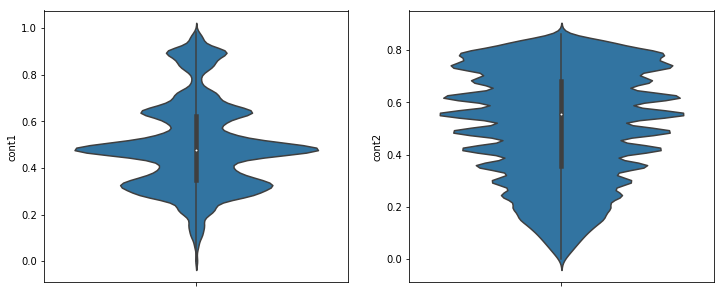

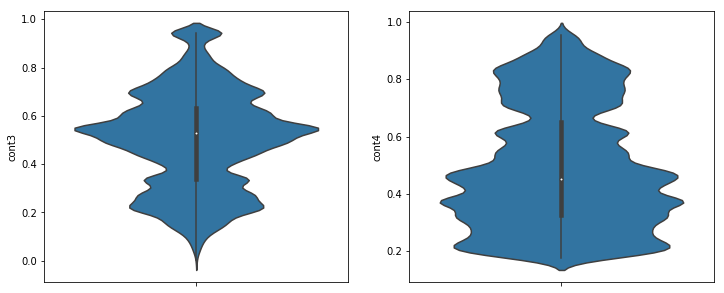

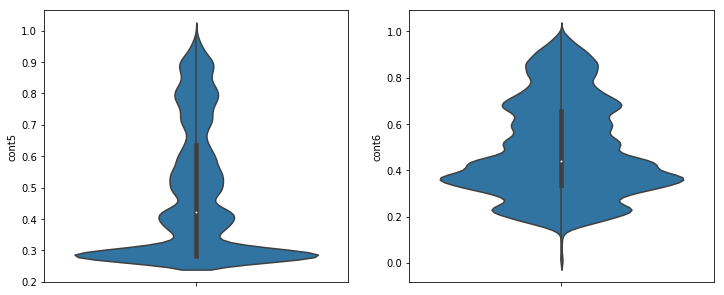

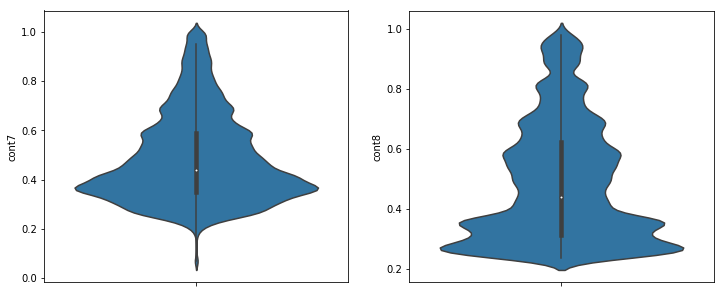

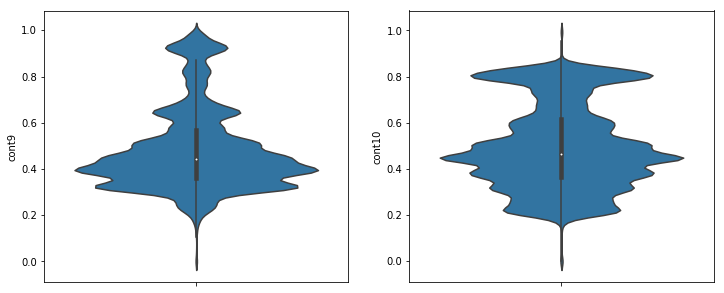

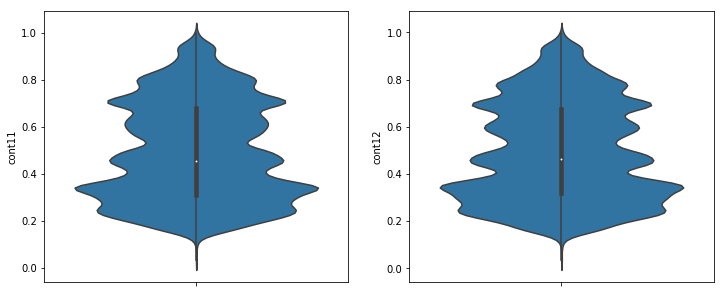

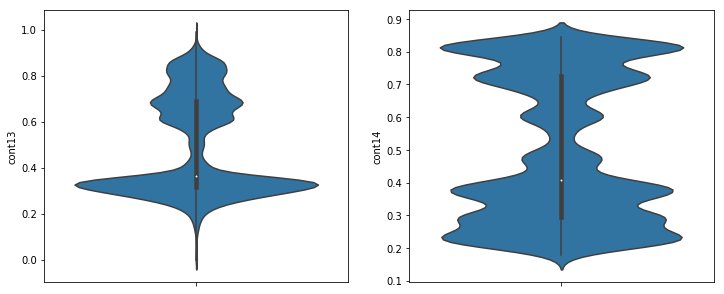

In [9]:
cols=X[cont_columns].columns 
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 5))
    for j in range(n_cols):
        sns.violinplot(cols[i*n_cols+j], data=X, ax=ax[j], orient='v')

In [22]:
round(X[cont_columns].corr(),2).style.background_gradient(cmap='coolwarm')

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1,-0.09,-0.45,0.37,-0.03,0.76,0.37,0.36,0.93,0.81,0.6,0.61,0.53,0.06
cont2,-0.09,1,0.46,0.04,0.19,0.02,0.05,0.14,-0.03,0.06,0.12,0.11,0.02,-0.05
cont3,-0.45,0.46,1,-0.34,0.09,-0.35,0.1,-0.19,-0.42,-0.33,0.03,0.01,-0.42,-0.04
cont4,0.37,0.04,-0.34,1,0.16,0.22,-0.12,0.53,0.33,0.28,0.12,0.13,0.18,0.02
cont5,-0.03,0.19,0.09,0.16,1,-0.15,-0.25,0.01,-0.09,-0.06,-0.15,-0.15,-0.08,-0.02
cont6,0.76,0.02,-0.35,0.22,-0.15,1,0.66,0.44,0.8,0.88,0.77,0.79,0.82,0.04
cont7,0.37,0.05,0.1,-0.12,-0.25,0.66,1,0.14,0.38,0.49,0.75,0.74,0.29,0.02
cont8,0.36,0.14,-0.19,0.53,0.01,0.44,0.14,1,0.45,0.34,0.3,0.32,0.48,0.04
cont9,0.93,-0.03,-0.42,0.33,-0.09,0.8,0.38,0.45,1,0.79,0.61,0.63,0.64,0.07
cont10,0.81,0.06,-0.33,0.28,-0.06,0.88,0.49,0.34,0.79,1,0.7,0.71,0.71,0.04


### 선형회귀모델 p-value, VIF 확인

In [227]:
X_cont = X[cont_columns]
X_train, X_test, Y_train, Y_test = train_test_split(X_cont, y, test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     391.2
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        05:09:23   Log-Likelihood:            -1.2356e+06
No. Observations:              131822   AIC:                         2.471e+06
Df Residuals:                  131807   BIC:                         2.471e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1473.6197     59.592     24.728      0.0

In [163]:
# p-value 0.05이상 변수 제거
X_cont = X[cont_columns]
X_cont = X_cont.drop(columns=['cont3','cont5'])
X_train, X_test, Y_train, Y_test = train_test_split(X_cont, y, test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     456.2
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:17:46   Log-Likelihood:            -1.2356e+06
No. Observations:              131822   AIC:                         2.471e+06
Df Residuals:                  131809   BIC:                         2.471e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1488.5530     49.086     30.326      0.0

In [174]:
# p-value 0.05이상 변수 제거 + 다중공선성 높은 변수 제거
X_cont = X[cont_columns]
X_cont = X_cont.drop(columns=['cont3','cont5','cont1','cont11'])
X_train, X_test, Y_train, Y_test = train_test_split(X_cont, y, test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     523.4
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:21:22   Log-Likelihood:            -1.2357e+06
No. Observations:              131822   AIC:                         2.471e+06
Df Residuals:                  131811   BIC:                         2.471e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1326.2330     47.806     27.742      0.0

In [35]:
# 최종 전저리 확인
X_cont = X[cont_columns]
X_cont_test = X_cont.drop(columns=['cont3','cont5','cont1','cont11'])

pca_test = PCA(n_components = 40)
X_pca_test = pca_test.fit_transform(X_cat_sqrt)
X_pca_test = pd.DataFrame(X_pca_test)

X_model_test = pd.concat([X_cont_test,X_pca_test], axis=1)
X_model_test.head(1)

,cont2,cont4,cont6,cont7,cont8,cont9,cont10,cont12,cont13,cont14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.245921,0.789639,0.718367,0.33506,0.3026,0.67135,0.8351,0.594646,0.822493,0.714843,-1.280046,13.160399,-0.367867,-3.392666,-3.522741,-0.282169,-7.457926,1.535918,-11.053655,-3.85042,0.379238,-3.130977,-5.300908,-5.907404,8.158263,0.312633,-2.287543,-9.970237,-0.844211,3.449526,1.098505,3.054457,2.147687,-2.001241,1.232084,4.783569,-0.471001,-1.91492,0.11589,1.864248,0.275132,-0.525718,0.385178,0.223104,-0.159835,-0.823173,0.44746,-0.090174,1.896334,2.397157


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_model_test, y, test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2614.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:43:48   Log-Likelihood:            -1.1928e+06
No. Observations:              131822   AIC:                         2.386e+06
Df Residuals:                  131771   BIC:                         2.386e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1992.6566     44.373     44.907      0.0

In [46]:
X_model_test_v2 = X_model_test.drop(columns=[36,37])
X_train, X_test, Y_train, Y_test = train_test_split(X_model_test_v2, y, test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2723.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:47:33   Log-Likelihood:            -1.1928e+06
No. Observations:              131822   AIC:                         2.386e+06
Df Residuals:                  131773   BIC:                         2.386e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1997.8439     43.641     45.779      0.0

## loss 시각화
- loss에 로그를 취하고 전처리된 X변수와 성능평가(R^2 기준)진행하였으나 오히려 R^2 감소
- lof를 취하지 않은 원래 loss를 활용

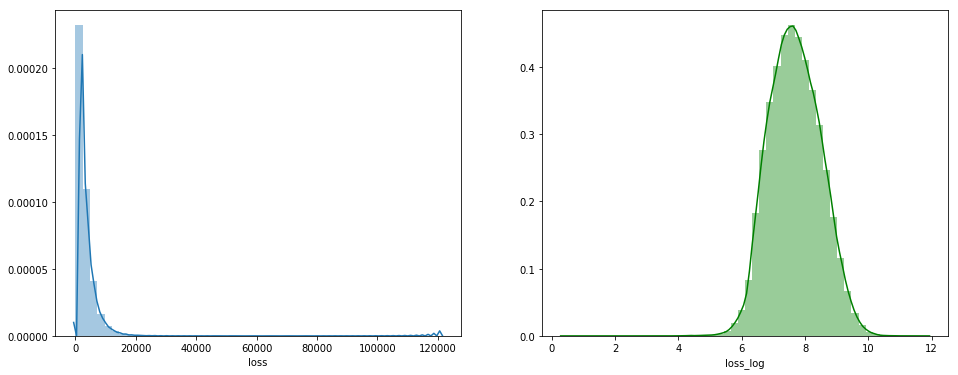

In [51]:
# loss가 좌편향되어 있어 log를 취함
train['loss_log'] = np.log1p(y)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
sns.distplot(y, ax=ax1)
sns.distplot(train.loss_log, ax=ax2, color="green")
plt.show()

In [49]:
round(pd.concat([X[cont_columns],train['loss'], train['loss_log']], axis=1).corr(),2).style.background_gradient(cmap='coolwarm')

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,loss_log,loss_robust
cont1,1,-0.09,-0.45,0.37,-0.03,0.76,0.37,0.36,0.93,0.81,0.6,0.61,0.53,0.06,-0.01,-0.01,-0.01
cont2,-0.09,1,0.46,0.04,0.19,0.02,0.05,0.14,-0.03,0.06,0.12,0.11,0.02,-0.05,0.14,0.1,0.14
cont3,-0.45,0.46,1,-0.34,0.09,-0.35,0.1,-0.19,-0.42,-0.33,0.03,0.01,-0.42,-0.04,0.11,0.08,0.11
cont4,0.37,0.04,-0.34,1,0.16,0.22,-0.12,0.53,0.33,0.28,0.12,0.13,0.18,0.02,-0.04,-0.03,-0.04
cont5,-0.03,0.19,0.09,0.16,1,-0.15,-0.25,0.01,-0.09,-0.06,-0.15,-0.15,-0.08,-0.02,-0.01,-0.01,-0.01
cont6,0.76,0.02,-0.35,0.22,-0.15,1,0.66,0.44,0.8,0.88,0.77,0.79,0.82,0.04,0.04,0.03,0.04
cont7,0.37,0.05,0.1,-0.12,-0.25,0.66,1,0.14,0.38,0.49,0.75,0.74,0.29,0.02,0.12,0.09,0.12
cont8,0.36,0.14,-0.19,0.53,0.01,0.44,0.14,1,0.45,0.34,0.3,0.32,0.48,0.04,0.03,0.03,0.03
cont9,0.93,-0.03,-0.42,0.33,-0.09,0.8,0.38,0.45,1,0.79,0.61,0.63,0.64,0.07,0.01,0.02,0.01
cont10,0.81,0.06,-0.33,0.28,-0.06,0.88,0.49,0.34,0.79,1,0.7,0.71,0.71,0.04,0.02,0.01,0.02


In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(X_model_test, train['loss_log'], test_size=0.3, random_state=5)
st_Reg(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:               loss_log   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2515.
Date:                Mon, 08 Apr 2019   Prob (F-statistic):               0.00
Time:                        05:31:33   Log-Likelihood:            -1.1506e+05
No. Observations:              131822   AIC:                         2.302e+05
Df Residuals:                  131771   BIC:                         2.307e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4064      0.012    594.534      0.0